# Auditing MHC-peptide binding and drug-target bioactivity prediction applications

Auditing PPI prediction applications, we learned that, in the absence of informative features, ML models can learn biases in the biological data. For the PPI case, the bias lies in the node degree representation imbalance for each protein. When the bias was removed from training sets for the PPI frameworks examined, the benchmarking performance dropped significantly. This raises a concern about whether other prediction problems where the inputs are also biased biological networks can bee suffering from the same learning bias. To examine this concern, here we audit two other biological network-based prediction applications.  

In [25]:
# Initializations 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import loadmat

## [1] MHC-peptide binding prediction

Unlike the PPI prediction case, the MHC-peptide data is a bipartite graph rather than a complete network. Still, these graphs are biased with nodes significantly differentially connected given the positive and negative training graphs. The first step in auditing according to our protocol is to perform generalizability auditing. Luckily, Merck has recently published a study where they examined the performance of several MHC-binding predictors against an independent dataset. We returned to the framework corresponding publications and retrieved their original performance, which corresponds to the best benchmarking performance in our article. Thus, we compared the two performances to determine whether these frameworks generalize or they potentially suffer from node-degree biases like PPI predictors. 

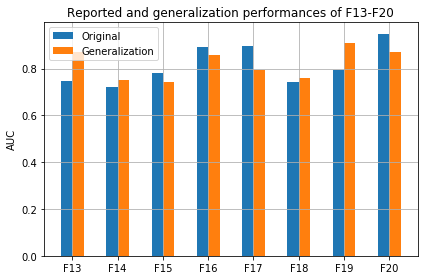

In [26]:
df1 = pd.read_csv('./DataForJupyters/MHCresults.csv')

# Setting up figures 
fig, axs = plt.subplots()
labels = ['F13','F14','F15','F16','F17','F18','F19','F20']
x = np.arange(len(labels))*2  # the label locations
width = 0.5  # the width of the bars

# Marcotte dataset
Org= df1.org
Gen = df1.gen
rects1 = axs.bar(x - (width/2), Org, width, label='Original')
rects2 = axs.bar(x + (width/2), Gen, width, label='Generalization')
axs.set_ylabel('AUC')
axs.set_title('Reported and generalization performances of F13-F20')
axs.set_xticks(x)
axs.set_xticklabels(labels)
axs.legend()
axs.grid(True)
fig.tight_layout()
plt.show()

### Why MHC-peptide binding predictors do not largely suffer from node-degree biases?
Unlike PPI predictors, MHC-peptide binding predictors do not suffer from biases, as evidenced by their good generalization above. While the input to them is biased training networks, why they behave differently from PPI predictors? 

We looked into the design of the eight examined MHC-peptide binding predictors and found two main reasons we believe are behind why they do not suffer from node degree biases.
 
(1) The input to frameworks F13-F16, F17, and F18 is transformed from paired-input into single-input by building a single predictor for each MHC molecule. The main input to the collection of the MHC-specific predictors is still paired-input, but the framework maps each pair to the predictor of the most similar MHC molecule where only the peptide is processed. 

(2) Although the input to frameworks F17 and F20 is solely paired-input, the design of the features is localized, unlike the protein features global summary description in the PPI predictors. Particularly, the MHC molecules are described by their binding pockets while the peptides are short in nature (localized). 

While their generalization is less efficient than the other frameworks with hidden single-input states, it can be the cost of their design learning for all MHC molecules at once while the others are optimized for each MHC individually. 


## [2] Drug-target bioactivity prediction
Another similarly node-degree bias prone application is the prediction of the bioactivity between drugs and protein targets. The input is bipartite graphs as in the MHC-peptide binding case. However, the predictors proposed in this field are not only classifiers but there exist some regression models as well. It is interesting to observe how the node-degree bias may affect the regression models in the paired-input case, if at all, and whether the classifiers are as biased as the PPI predictors. 

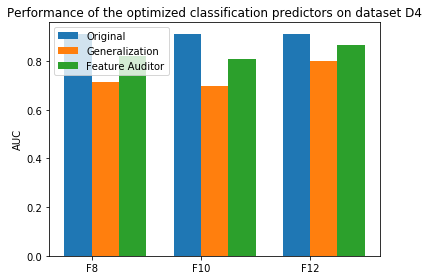

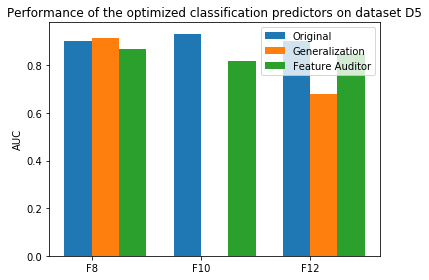

In [27]:
df2 = pd.read_csv('./DataForJupyters/KDIresultSummary.csv')

# Setting up figures 
labels = ['F8', 'F10', 'F12']
x = np.arange(len(labels))*2  # the label locations
width = 0.5  # the width of the bars

# D4
Bench = [df2.D4bench[0], df2.D4bench[2], df2.D4bench[4]]
Gen = [df2.D4gen[0], df2.D4gen[2], df2.D4gen[4]]
FeatureA = [df2.D4FA[0], df2.D4FA[2],df2.D4FA[4]]

fig, ax = plt.subplots()
rects1 = ax.bar(x - (width/2), Bench, width, label='Original')
rects2 = ax.bar(x + (width/2), Gen, width, label='Generalization')
rects3 = ax.bar(x + 3*(width/2), FeatureA, width, label='Feature Auditor')

ax.set_ylabel('AUC')
ax.set_title('Performance of the optimized classification predictors on dataset D4')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()

# D5
Bench = [df2.D5bench[0], df2.D5bench[2], df2.D5bench[4]]
Gen = [df2.D5gen[0], df2.D5gen[2], df2.D5gen[4]]
FeatureA = [df2.D5FA[0], df2.D5FA[2],df2.D5FA[4]]

fig, ax = plt.subplots()
rects1 = ax.bar(x - (width/2), Bench, width, label='Original')
rects2 = ax.bar(x + (width/2), Gen, width, label='Generalization')
rects3 = ax.bar(x + 3*(width/2), FeatureA, width, label='Feature Auditor')

ax.set_ylabel('AUC')
ax.set_title('Performance of the optimized classification predictors on dataset D5')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()


In these classification-based predictors, while the amount of performance that can otherwise be interpreted by the node degree distribution (performance of *Feature Auditor*) is high, the classification predictors show considerable generalization that is dependent on the training dataset and the framework used. Overall, these frameworks seem to suffer some node-degree bias but not as profound as in the PPI case. 

Now, let's look at how the regression predictors generalize. 


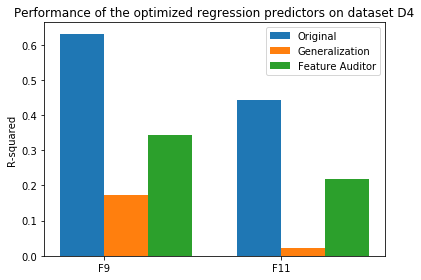

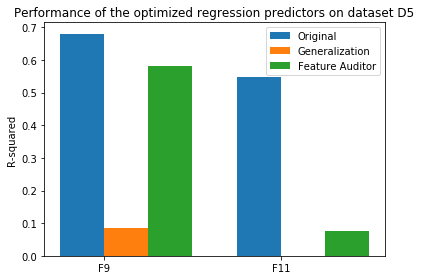

In [29]:
labels = ['F9', 'F11']
x = np.arange(len(labels))*2  # the label locations
width = 0.5  # the width of the bars

# D4
Bench = [df2.D4bench[1], df2.D4bench[3]]
Gen = [df2.D4gen[1], df2.D4gen[3]]
FeatureA = [df2.D4FA[1], df2.D4FA[3]]

fig, ax = plt.subplots()
rects1 = ax.bar(x - (width/2), Bench, width, label='Original')
rects2 = ax.bar(x + (width/2), Gen, width, label='Generalization')
rects3 = ax.bar(x + 3*(width/2), FeatureA, width, label='Feature Auditor')

ax.set_ylabel('R-squared')
ax.set_title('Performance of the optimized regression predictors on dataset D4')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()

# D5
Bench = [df2.D5bench[1], df2.D5bench[3]]
Gen = [df2.D5gen[1], df2.D5gen[3]]
FeatureA = [df2.D5FA[1], df2.D5FA[3]]

fig, ax = plt.subplots()
rects1 = ax.bar(x - (width/2), Bench, width, label='Original')
rects2 = ax.bar(x + (width/2), Gen, width, label='Generalization')
rects3 = ax.bar(x + 3*(width/2), FeatureA, width, label='Feature Auditor')

ax.set_ylabel('R-squared')
ax.set_title('Performance of the optimized regression predictors on dataset D5')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()


Regression drug-target bioactivity predictors do not generalize well, although not all performance can be explained by node-degree bias. Further auditing is necessary for the regression models to figure out the reason. 

# Conclusions: 

Overall, MHC-peptide binding predictors do not seem to suffer any node-degree bias due to how traditionally they are designed as a collection of predictors, each trained for an individual MHC molecule, while the paired-input ones use well-designed localized features that allow the models to learn informatively. On the other hand, drug-target bioactivity classification-based predictors suffer some node-degree bias but not to the same degree as in the PPI case while the regression-based versions exhibit strong bias. 